# Homework 1 : Batch Gradient Descent, Cost Optimization

## The Problem
Implement a linear regression algorithm as a gradient descent optimization that will measure how statistically dependent two variables are and apply the algorithm on the test datasets.

- The test dataset is historical fishery harvest and effort data for three groups of stakeholders
    1. Dipnet Fishermen
    2. Driftnet Fishermen
    3. Setnet Fishermen
- Data recorded on annual basis for last 15 - 30 years.
- Free variable : days fished (or permits issued)
- How correlated (or dependent) the harvest is on the fishermen's effort.

## The Procedure
- Implement regression model as cost optimization algorithm that uses batch gradient descent 
- The regression model should test function of batch size on model convergence
- Show error loss function (Y axis) over time (X axis) as function of tested batch size and number of training epochs
- Give all resulting parametric linear correlations for each dataset



## The Big Picture
- Gradient Descent : optimization algorithm often used for finding the weights or coefficients of machine learning algorithms. It works by having the model make predictions on training data and using the error on the predicitions to update the model in such a way as to reduce error.
- The goal is to find model weights that minimize the error of the model on the training dataset

The following is pseudocode for gradient descent

h_b(x) = b_0 + b_1x

```python
model = initialization(...)
n_epochs = ...
train_data = ...
for i in n_epochs:
    train_data = shuffle(train_data)
```

We will use the Mean Squared Error as our loss function:
ERROR = ((b1*X1+b0 - Y1)**2 + (b1*X2+b0 - Y2)**2 + (b1*X3+b0 - Y3)**2)/3


## After fitting the data
- Use R squared for goodness of fit
- R-squared: Percentage of response variation explain by linear model


# _Let's get started..._

***

## Part 1: Examine the data
The first step is to read the csv files, format the datasets as DataFrame objects, and examine the plots with regression lines based on default b0 and b1 weights.
Regression is a statistical model representing the relationship between two or more variables.

For linear regression, assumptions that will have to be made beforehand include:
- The data is uniformly distributed
- Hypothesis on free variable is within range
- N measurements > parameters
- Free variable is continuous

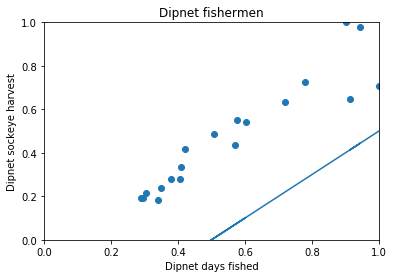

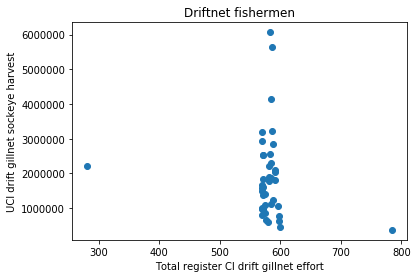

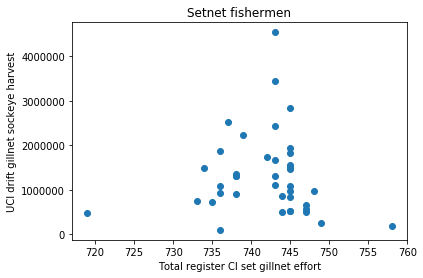

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from functools import reduce

batch_sizes = [1,5,10,15,20]

b1 = 1.0
b0 = -0.5

# Load dataframes
dip_df = pd.read_csv("dip-har-eff.csv")
drift_df = pd.read_csv("drift-har-eff.csv")
set_df = pd.read_csv("set-har-eff.csv")

# Gather info
dip_rows = dip_df.shape[0]
dip_cols = dip_df.shape[1]


dip_df = dip_df.values
dip_df = dip_df[np.arange(0, dip_rows), :]

dip_X = dip_df[:,1]
dip_Y = dip_df[:,2]
dip_X_max = np.max(dip_X)
dip_Y_max = np.max(dip_Y)

dip_X = np.true_divide(dip_X, dip_X_max)
dip_Y = np.true_divide(dip_Y, dip_Y_max)


# Config pyplot
plt.xlim(0, max(dip_X))
plt.ylim(0, max(dip_Y))


plt.title('Dipnet fishermen')
plt.xlabel('Dipnet days fished')
plt.ylabel('Dipnet sockeye harvest')
plt.scatter(dip_X, dip_Y)
plt.plot (dip_X, b1*dip_X + b0)
plt.show()

drift_X = drift_df.iloc[:,1]
drift_Y = drift_df.iloc[:,2]
drift_X_max = np.max(drift_X)
drift_Y_max = np.max(drift_Y)

plt.title('Driftnet fishermen')
plt.xlabel('Total register CI drift gillnet effort')
plt.ylabel('UCI drift gillnet sockeye harvest')
plt.scatter(drift_X, drift_Y)

plt.show()

set_X = set_df.iloc[:,1]
set_Y = set_df.iloc[:,2]
set_X_max = np.max(set_X)
set_Y_max = np.max(set_Y)

plt.title('Setnet fishermen')
plt.xlabel('Total register CI set gillnet effort')
plt.ylabel('UCI drift gillnet sockeye harvest')
plt.scatter(set_X, set_Y)

plt.show()

 b0: -0.185933502676 b1: 0.284129851245 b2: 0.507728560334 Error: 14.177371132
 b0: 0.1083986108 b1: 0.463295190258 b2: 0.630713936487 Error: 0.677269992956
 b0: 0.0343885445762 b1: 0.419680997248 b2: 0.600519419055 Error: 0.196953246484
 b0: 0.052090415281 b1: 0.431477023437 b2: 0.608388066526 Error: 0.0788325770655
 b0: 0.047008801607 b1: 0.429453313929 b2: 0.606729982345 Error: 0.0936838286297
 b0: 0.0476349304665 b1: 0.430841051545 b2: 0.607392612041 Error: 0.0892466739828
 b0: 0.0468755780093 b1: 0.431353941739 b2: 0.607431128732 Error: 0.0904537852327
 b0: 0.0464935095744 b1: 0.432060538286 b2: 0.607581755102 Error: 0.0902976947241
 b0: 0.0460477065486 b1: 0.4326966182 b2: 0.607664381632 Error: 0.090473424729
 b0: 0.0456457661262 b1: 0.433329520407 b2: 0.607726720479 Error: 0.0905567228377
 b0: 0.0452589078656 b1: 0.433943955536 b2: 0.60775957933 Error: 0.0906536312426
 b0: 0.0448924348604 b1: 0.434545092328 b2: 0.607767735202 Error: 0.0907383570543
 b0: 0.0445433012772 b1: 0.435

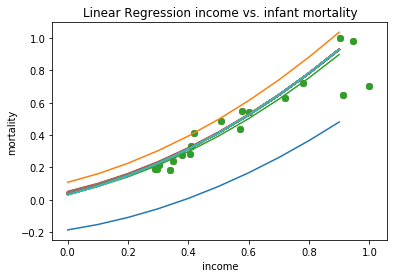

In [8]:
import matplotlib.pyplot as plt
import random

def calc_total_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row

def calc_b2_Error(row, col):
    return (b2*row**2 + b1*row+b0 - col) * row**2

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)  
    ERROR_SUM = sum(errorsList)
    return ERROR_SUM / 3

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

# init weights
b2 = 1.0
b1 = 1.0
b0 = 1.0

learn = 0.5

plt.xlabel('income')
plt.ylabel('mortality')
plt.title('Linear Regression income vs. infant mortality')
plt.scatter(dip_X, dip_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dip_X), 5)
sample_X = [dip_X[i] for i in sorted(batchSample)]
sample_Y = [dip_Y[i] for i in sorted(batchSample)]

for i in range(100):
    ERROR = mse(dip_X, dip_Y, calc_total_Error)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b2_temp_error = mse(sample_X, sample_Y, calc_b2_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    b2 = adjustWeight(b2, learn, b2_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " b2: " + str(b2) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b2*X_test**2+ b1*X_test + b0)
    plt.pause(0.1)

plt.show()